Завдання:

Створення власного набору даних для класифікації:
- Бінарна класифікація: Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).
- Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").

Побудова нейронної мережі для класифікації:
- Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).
- Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.

Експерименти з покращенням результатів:
- Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
- Збільште кількість нейронів у кожному шарі.
- Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.
- Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.

Візуалізація процесу навчання:
- Здійсніть візуалізацію зміни функції втрат та точності на тренувальному та тестувальному наборах даних під час тренування моделі

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [63]:
np.random.seed(19)

#кількість атрибутів
n_samples = 10_000

#два числові атрибути (оцінки студентів)
attribute_a = np.random.uniform(low=0, high=100, size=n_samples)
attribute_b = np.random.uniform(low=0, high=100, size=n_samples)

noise = np.random.normal(loc=0, scale=5, size=n_samples) #умовні додаткові бали
attribute_a += noise
attribute_b += noise

#визначення пройшов/не пройшов; якщо менше 36 - автоматично за бортом
passed = ~((attribute_a < 36) | (attribute_b < 36))
# тільда змінює логічне значення виразу, що мені й потрібно


#створюємо датафрейм
data = pd.DataFrame({
    'Оцінка 1': attribute_a,
    'Оцінка 2': attribute_b,
    'Пройшов:': passed.astype(int)
})

#зберігаю
data.to_csv('data_for_binary_classification.csv', index=False)

#ознаки і цільова змінна
X = np.column_stack((attribute_a, attribute_b))
y = passed.astype(int)

#розділення на набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#нейронка 3 шари
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

#компіляція моделі
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#тренуємо модель
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

#оцінка ефективності моделі на тестовому наборі
y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_train, y_train)

print(f'Тестова точність: {test_acc}')
print(f'Тестові втрати: {test_loss}')


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1.2484 - accuracy: 0.7550 - val_loss: 0.2917 - val_accuracy: 0.8535
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8566 - val_loss: 0.2548 - val_accuracy: 0.8725
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.8720 - val_loss: 0.2330 - val_accuracy: 0.8895
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.8923 - val_loss: 0.2209 - val_accuracy: 0.8840
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9059 - val_loss: 0.1922 - val_accuracy: 0.9325
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9219 - val_loss: 0.1782 - val_accuracy: 0.9495
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9320 - val_loss: 0.1640 - val_accuracy: 0.9600
Epoch 

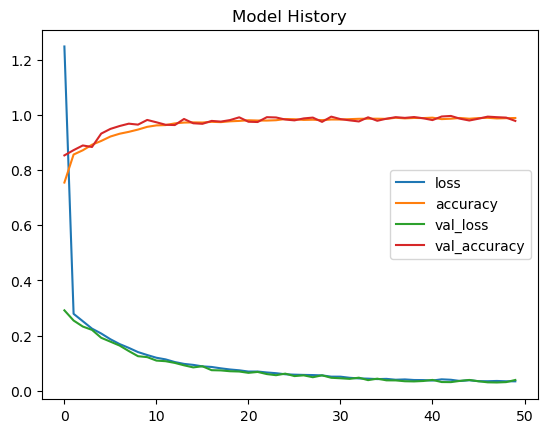

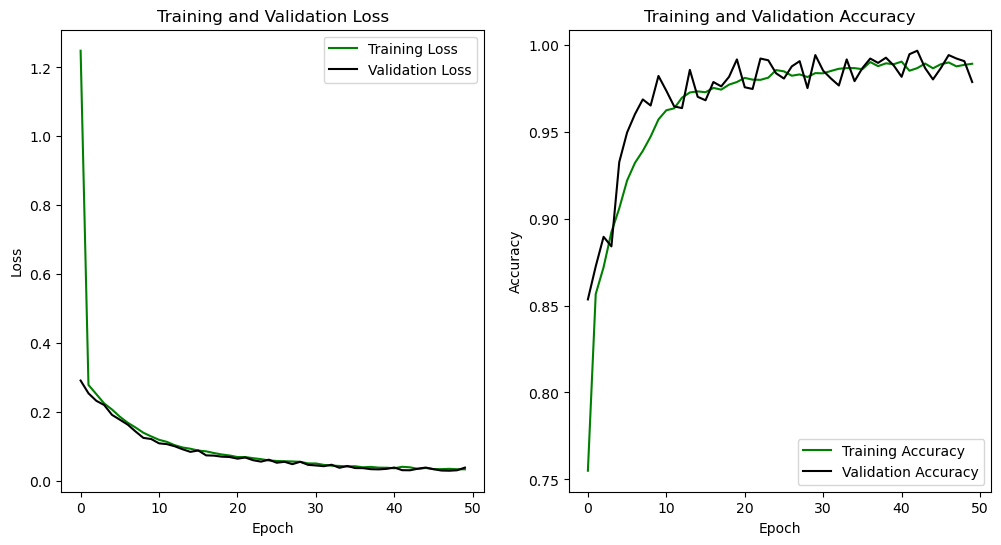

In [64]:
#візуалізація
pd.DataFrame(history.history).plot(title="Model History")

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color = 'g')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'black')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'g')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color = 'black')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()